## **Welcome to the NAM group** 
We begin our journey into the machine learning and deep learning world by starting with simple algorithms like **linear regression**.

## Population vs sample


---


A **population** is the entire group for which you want to draw a conclusion from or study. However, it is always impossible to have the full population and we always have just a **sample** from the population. When we train our model on a sample we want to obtain a model that will work well on the entire population, we want a model that can generalize to the population. 

## Machine learning


---


Machine learning is the study of computer algorithms that allow computer programs to automatically improve through experience. A computer program is giving **data**, it learns from these data and improves its **performance** as it gains **experience** from the data. Machine learning is divided into several parts. Two of these parts whichg are very popular are **supervised** and **unsupervised** machine learning. The difference is in supervised machine learning we provide we provide our model with both **data** and **labels**. In unsupervised machine learning we give our model only labels.
Example of supervised learning include **classification** and **regression**.
Example of unsupervised learning is **clustering**.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
pd.options.display.width=0

Let us begin with regression using the carlifonia dataset. **Pandas** is one of python's most powerful libraries, it makes data manipulation smooth and nice. **Numpy** or numeric python is a backbone in python mathematical computing. **Scikit-learn** or sklearn  for short is a machine learning library with implementations for several algorithms.

# **Supervised Machine learning**
## Linear Regression


---


Linear regression is a method to model the relationship between one response variable (**y**) and one or more explanatory variables (**x**). When we have one explanatory variable it is called a **simple linear regression** and when we have more than one explanatory variables it is called **mutiple linear regression**. Given y = **b1**x + **b0**, we want to find the appropriate **b1** and **b0** values such that with any **x** we can predict **y**. We will build a multiple linear regression model below. If you want to build a simple linear regression model, just reduce the number of variables selected to one. Note however, that some response variables (y) can not be explained well by just a single explanatory variable (x). If you change the number of variables selected below, you will observe the R-squared score changing too. Below is an example of a simple regression model showing the regression line drawn through data points.

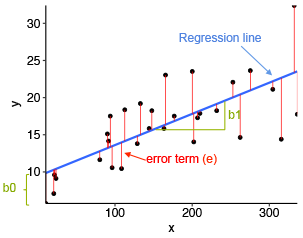

In [ ]:
carl_data = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv')
print(carl_data.head())
print(carl_data.info()) # tells us the various columns, their data type and presence or absence of missing values


   longitude  latitude  ...  median_house_value  ocean_proximity
0    -122.23     37.88  ...            452600.0         NEAR BAY
1    -122.22     37.86  ...            358500.0         NEAR BAY
2    -122.24     37.85  ...            352100.0         NEAR BAY
3    -122.25     37.85  ...            341300.0         NEAR BAY
4    -122.25     37.85  ...            342200.0         NEAR BAY

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-nu

We can use **pearson's correlation** to see the correlation between variables in the data. Below we get the correlation matrix with pandas and the visualize it in a well coloured table. Red indicates a very high correlation while blue indicate very low correlation. Looking at that we can select some variables with the highest correlation to **median_house_value **and perform linear regression.

In [ ]:
corr = carl_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
sel_variables = carl_data[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age', 'latitude']]
print(sel_variables.head())

   median_house_value  median_income  total_rooms  housing_median_age  latitude
0            452600.0         8.3252        880.0                41.0     37.88
1            358500.0         8.3014       7099.0                21.0     37.86
2            352100.0         7.2574       1467.0                52.0     37.85
3            341300.0         5.6431       1274.0                52.0     37.85
4            342200.0         3.8462       1627.0                52.0     37.85


# Data scaling


---



It is very popular to see people rescale their data in machine learning. Every variable has values in different ranges. For example, median_house_values are in the hundreds of thousand scale, total rooms is in the tens of thousands. Feature scaling helps to improve performances of machine learning algorithms. Read [this](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) to give you some more reason why it is important.

## Standardization


---


To standardize data, we subtract the **mean** and divide by the **standard deviation**. In statistical term we say we are zero centering the data and scaling to unit variance. What we have at the end are values called **z-scores**.

## Normalization


---


This is another scaling method which rearranges the values such that the fall between 0 and 1. The easiest way to normalize a vector of values is to divide all values by the maximum value.

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(sel_variables[['median_income', 'total_rooms', 'housing_median_age', 'latitude']])
y = sel_variables['median_house_value'].values
print(x[0:3, :])


[[ 2.34476576 -0.8048191   0.98214266  1.05254828]
 [ 2.33223796  2.0458901  -0.60701891  1.04318455]
 [ 1.7826994  -0.53574589  1.85618152  1.03850269]]


Next we build our **linear regression model**, which is quite easy to do thanks to **scikit-learn**. First of all we will split our data into a **training** and **test** set. This is a very important concept in the field of machine learning. We always fit/train our models to the training data and the use the test data to validate it. We do this because we want to test our data on new data it has never seen before. This will helps us assess how good our model really is. Another important reason for this is **overfitting**. 
## Overfitting


---


Overfitting is a situation in which our model works well on the training set but performs poorly on new data. Think of this like our model has memorized our training data and will work well on it but poorly on the test data. 

## Generalization


---


One of the main aims of building models in machine learning is so that we can deploy them into the world and use them for predictions. When a model works well on our training set and on the test set, there is a high possibility of it working well in the real world. A model that works well in the real world is said to **generalize** well. 


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
LR_clf = LinearRegression()
LR_clf.fit(x_train, y_train)

print('Score on training set: {}'.format(LR_clf.score(x_train, y_train)))
print('Score on test set: {}'.format(LR_clf.score(x_test, y_test)))

Score on training set: 0.5250451284163651
Score on test set: 0.5069108830132449


As seen above the model has a higher **R-squared** value on the training than test set. The model is slightly overfitting but this is not that bad. It would have been worse if the **R-squared** differed say by atleats 0.10.
We used R-squared as our performance measure, but there are several other performance measures, like the **mean squared error**, **mean absolute error**. When we started our journey in linear regression, we said our target was to estimate **coefficients (b1)** and an **intercept (b0)** for our linear equation y = **b1**x + **b0**. Below we will see how to get these estimated coefficients. The number of coefficients will be equal to the number of variables we used in our model. The best R-squared value is 1. we are having 0.5 at the moment.

In [ ]:
print('Coefficients: {}, intercept: {}'.format(LR_clf.coef_, LR_clf.intercept_))  

Coefficients: [ 80271.92474495   8213.56871123  24759.49173855 -10259.33615206], intercept: 206860.74484797145


Now that we have our model and estimates of the coefficients and intercept, we can predict the median house value by simply calling the predict function on our model and passing it our new data.

In [ ]:
predictions = LR_clf.predict(x_test)
print(predictions)

[100874.31718299 156463.69663014 230398.02544725 ... 423635.57294965
 169516.53716442 174087.18308825]


# **Your turn** 

Why don't you try it out and see if you can beat my R-squared score. Practice makes perfect. **Go ahead!!!**

### **Hint**
Maybe if you add some new variables the R-squared may increase.